# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [61]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import pickle

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../../../")
from src import funciones_problemas_regresion as fpr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
df =  pd.read_pickle("../../../datos/cluster_0/df_nonulls_encoded_sinout_scaled.pkl").reset_index(drop=True)
variable_respuesta = "Profit"

df.head()

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,190.9200,-1.254560,-0.946181,1.321801,1.0,0.0,14.502818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0
1,45.9000,1.704839,-0.453514,1.321801,1.0,0.0,14.465614,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0
2,503.7822,0.000000,0.000000,10.307980,1.0,0.0,14.350620,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,87.8400,1.144966,0.546486,0.118540,1.0,0.0,13.968433,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0
4,213.6600,1.704839,-0.453514,1.321801,1.0,0.0,13.910936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0


In [63]:
#df = df.drop(columns=["Ship Mode_First Class", "Ship Mode_Same Day","Ship Mode_Second Class", "Ship Mode_Standard Class", "Segment_Consumer", "Segment_Corporate", "Segment_Home Office", "Order Priority_Critical", "Order Priority_High",	"Order Priority_Low","Order Priority_Medium"])

Probaremos varios modelos de ensamble y compararemos sus métricas a ver cual es el que arroja mejores resultados.

## Random Forest Regressor

In [64]:
variable_respuesta = "Profit"
modelo = "RandomForestRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_random_forest_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con RandomForestRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 15, 'max_leaf_nodes': 300, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 150}


,r2_scores,MAE,MSE,RMSE
train,0.528250,14.843349,1404.531759,37.477083
test,0.491978,15.639328,1419.210935,37.672416


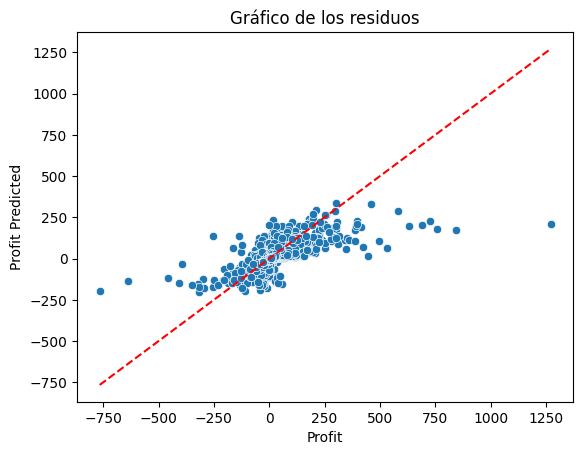

In [65]:
clase_arbol.visualizacion_residuos()

Pordemos observar que a penas hay overfitting y el RMSE de 37 para un profit que varía entre -1000 y 2000 está bien, podemos ver que dondemás se confunde es en los valores más extremos, pues es de los que menos datos tiene para aprender.

## Gradient Boosting Regressor

In [66]:
modelo = "GradientBoostingRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_rf = {
    'n_estimators': [50, 100, 150], #número de árboles que queremos en el bosque
    'max_depth': [15, 20, 30],
    'min_samples_split': [15, 20, 25],
    'min_samples_leaf': [15, 20, 25], 
    'max_leaf_nodes': [100, 200, 300]
}

df_metricas, modelo_grad_boosting_1 = clase_arbol.grid_search(params_rf, cv=3)
df_metricas

Calculando el modelo con GradientBoostingRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'max_depth': 20, 'max_leaf_nodes': 100, 'min_samples_leaf': 25, 'min_samples_split': 15, 'n_estimators': 50}


,r2_scores,MAE,MSE,RMSE
train,0.643640,13.664251,1060.984027,32.572750
test,0.502411,15.655249,1390.066017,37.283589


## XGBRegressor

In [67]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight':  [3, 4, 5, 6],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 65, 'subsample': 1.0}


,r2_scores,MAE,MSE,RMSE
train,0.654057,15.068271,1029.967972,32.093114
test,0.535571,15.864066,1297.429759,36.019852


In [68]:
modelo = "XGBRegressor"

# Inicializamos la clase, separamos VR y VD y separamos el train y el test.
clase_arbol = fpr.ProblemaRegresion(df, variable_respuesta, modelo)
clase_arbol.separar_variables()
clase_arbol.separar_train_test()

# Estudiamos cuales son los mejores parámetros, entrenamos al modelo y vemos las métricas.
params_xgb = {
    'n_estimators': [60, 65, 70, 75],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5, 6, 7],
    'min_child_weight':  [2, 3, 4, 5],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

df_metricas, modelo_xgb = clase_arbol.grid_search(params_xgb, cv=5)
df_metricas

Calculando el modelo con XGBRegressor...
Las mejores métricas para el modelo de DecisionTreeRegressor son:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 75, 'subsample': 1.0}


,r2_scores,MAE,MSE,RMSE
train,0.709306,14.396381,865.476666,29.418985
test,0.523755,15.730595,1330.440277,36.475201


Las métrcas de train han mejorado, sin embargo, esto se debe a que comienza a haber más overfitting.

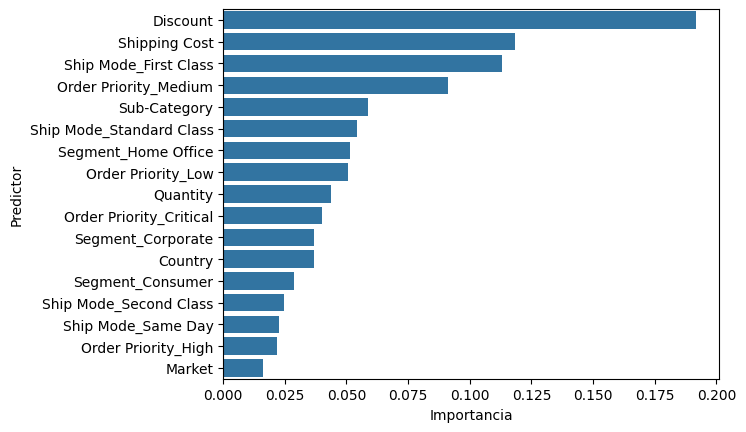

In [69]:
clase_arbol.importancias_variables()